In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive

Mounted at /content/drive
/content/drive/MyDrive


In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.7 MB/s eta 0:00:00


In [ ]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 18.3 MB/s eta 0:00:00


In [ ]:
!pip install transformers torch

In [ ]:
!pip install pysal

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 21.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 51.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.3/347.3 kB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.0/59.0 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.3/141.3 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.9/53.9 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.1/2

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=e29d9e5ac8246038a9f11ddcb7b38afb1ac3c9f738df026efd7cf596d3a19883
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
# General libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning and modeling libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, DBSCAN

# Geospatial analysis libraries
import folium
from folium.plugins import HeatMap
from geopy.distance import geodesic

# GeoPandas and PySAL for spatial autocorrelation (Moran's I and LISA)
import geopandas as gpd
from pysal.lib import weights
from pysal.explore import esda

# Sentiment analysis
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Missing value handling and feature engineering
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures

# Hyperparameter tuning
import optuna
from optuna.trial import Trial
from sklearn.model_selection import cross_val_score

# LightGBM
import lightgbm as lgb

#lime
import lime
import lime.lime_tabular
import sklearn.ensemble

#shap
import shap


/usr/local/lib/python3.10/dist-packages/spaghetti/network.py:41: FutureWarning: The next major release of pysal/spaghetti (2.0.0) will drop support for all ``libpysal.cg`` geometries. This change is a first step in refactoring ``spaghetti`` that is expected to result in dramatically reduced runtimes for network instantiation and operations. Users currently requiring network and point pattern input as ``libpysal.cg`` geometries should prepare for this simply by converting to ``shapely`` geometries.
  warnings.warn(dep_msg, FutureWarning, stacklevel=1)
/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
# Load data
data = pd.read_csv('/content/drive/MyDrive/Homestays_Data.csv')

# Convert date columns
data['host_since'] = pd.to_datetime(data['host_since'], errors='coerce')
data['last_review'] = pd.to_datetime(data['last_review'], errors='coerce')

# Drop rows with missing 'host_since' or 'last_review' as they are critical for feature engineering
data = data.dropna(subset=['host_since', 'last_review'])

# Feature Engineering using .loc[]
data.loc[:, 'Host_Tenure'] = (datetime.now() - data['host_since']).dt.days / 365
data.loc[:, 'Amenities_Count'] = data['amenities'].apply(lambda x: len(x.split(',')) if isinstance(x, str) else 0)
data.loc[:, 'Days_Since_Last_Review'] = (datetime.now() - data['last_review']).dt.days

# Fill missing values in newly created features with 0 where appropriate
data.loc[:, 'Host_Tenure'].fillna(0, inplace=True)
data.loc[:, 'Days_Since_Last_Review'].fillna(0, inplace=True)


<ipython-input-13-5da8e91a6fc3>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, 'Host_Tenure'] = (datetime.now() - data['host_since']).dt.days / 365


In [ ]:

for column in data.columns:
  print(f"Column '{column}' has {data[column].nunique()} unique values.")


Column 'id' has 58132 unique values.
Column 'log_price' has 673 unique values.
Column 'property_type' has 32 unique values.
Column 'room_type' has 3 unique values.
Column 'amenities' has 53384 unique values.
Column 'accommodates' has 16 unique values.
Column 'bathrooms' has 17 unique values.
Column 'bed_type' has 5 unique values.
Column 'cancellation_policy' has 5 unique values.
Column 'cleaning_fee' has 2 unique values.
Column 'city' has 6 unique values.
Column 'description' has 57674 unique values.
Column 'first_review' has 2553 unique values.
Column 'host_has_profile_pic' has 2 unique values.
Column 'host_identity_verified' has 2 unique values.
Column 'host_response_rate' has 77 unique values.
Column 'host_since' has 3058 unique values.
Column 'instant_bookable' has 2 unique values.
Column 'last_review' has 1371 unique values.
Column 'latitude' has 58100 unique values.
Column 'longitude' has 58049 unique values.
Column 'name' has 57668 unique values.
Column 'neighbourhood' has 598 u

In [ ]:
# Drop columns that won't be used
data = data.drop(columns=['id', 'name', 'thumbnail_url'])

# Handle categorical data
label_encoder = LabelEncoder()
data['property_type_encoded'] = label_encoder.fit_transform(data['property_type'])
data['room_type_encoded'] = label_encoder.fit_transform(data['room_type'])
data['bed_type_encoded'] = label_encoder.fit_transform(data['bed_type'])
data['cancellation_policy_encoded'] = label_encoder.fit_transform(data['cancellation_policy'])
data['city_encoded'] = label_encoder.fit_transform(data['city'])
data['neighbourhood_encoded'] = label_encoder.fit_transform(data['neighbourhood'])
data['zipcode_encoded'] = label_encoder.fit_transform(data['zipcode'])


In [ ]:
data['amenities'][2]

'{TV,"Cable TV","Wireless Internet","Air conditioning",Kitchen,Breakfast,"Buzzer/wireless intercom",Heating,"Family/kid friendly","Smoke detector","Carbon monoxide detector","Fire extinguisher",Essentials,Shampoo,Hangers,"Hair dryer",Iron,"Laptop friendly workspace","translation missing: en.hosting_amenity_50"}'

In [ ]:
import re

# Function to manually clean the amenities strings and convert them to a list
def clean_amenities(amenities):
    if isinstance(amenities, str):  # Check if the data is a string
        # Remove the curly braces
        amenities = amenities.strip('{}')

        # Replace double quotes with nothing to normalize unquoted items
        amenities = amenities.replace('"', '')

        # Split the string by commas to create a list of amenities
        return re.split(r',\s*(?![^()]*\))', amenities)  # Split, ignoring commas within parentheses (if any)
    return amenities

# Apply the cleaning function
data['Amenities_List'] = data['amenities'].apply(clean_amenities)

# Check if the column is now properly converted to lists
print(data['Amenities_List'].head())

0    [Wireless Internet, Air conditioning, Kitchen,...
1    [Wireless Internet, Air conditioning, Kitchen,...
2    [TV, Cable TV, Wireless Internet, Air conditio...
4    [TV, Internet, Wireless Internet, Air conditio...
5    [TV, Wireless Internet, Heating, Smoke detecto...
Name: Amenities_List, dtype: object


In [ ]:
# Create binary columns for top amenities
top_amenities = data['Amenities_List'].explode().value_counts().head(20).index.tolist()
for amenity in top_amenities:
    data[f'amenity_{amenity}'] = data['Amenities_List'].apply(lambda x: 1 if amenity in x else 0)

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import seaborn as sns
import matplotlib.pyplot as plt

# Load DistilBERT (SST-2) for binary sentiment analysis
distilbert_tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased-finetuned-sst-2-english')
distilbert_model = AutoModelForSequenceClassification.from_pretrained('distilbert-base-uncased-finetuned-sst-2-english')

# Load RoBERTa for multi-class sentiment analysis
roberta_tokenizer = AutoTokenizer.from_pretrained('cardiffnlp/twitter-roberta-base-sentiment')
roberta_model = AutoModelForSequenceClassification.from_pretrained('cardiffnlp/twitter-roberta-base-sentiment')

# Function to get sentiment scores using DistilBERT (SST-2)
def get_distilbert_sentiment_score(text):
    inputs = distilbert_tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)
    with torch.no_grad():
        outputs = distilbert_model(**inputs)
    # Get probabilities
    probs = torch.nn.functional.softmax(outputs.logits, dim=-1)
    return {
        "positive": probs[0][1].item(),
        "negative": probs[0][0].item(),
        "neutral": 1 - max(probs[0][0].item(), probs[0][1].item())  # Approximate neutral score
    }

# Function to get sentiment scores using RoBERTa (multi-class sentiment: positive, neutral, negative)
def get_roberta_sentiment_score(text):
    inputs = roberta_tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)
    with torch.no_grad():
        outputs = roberta_model(**inputs)
    # Get probabilities
    probs = torch.nn.functional.softmax(outputs.logits, dim=-1)
    return {
        "positive": probs[0][2].item(),  # RoBERTa classifies positive as index 2
        "neutral": probs[0][1].item(),   # RoBERTa classifies neutral as index 1
        "negative": probs[0][0].item()   # RoBERTa classifies negative as index 0
    }

# Apply sentiment analysis using both models and average the scores
def get_combined_sentiment_score(text):
    distilbert_scores = get_distilbert_sentiment_score(text)
    roberta_scores = get_roberta_sentiment_score(text)

    # Average the scores from both models
    positive_score = np.mean([distilbert_scores['positive'], roberta_scores['positive']])
    negative_score = np.mean([distilbert_scores['negative'], roberta_scores['negative']])
    neutral_score = np.mean([distilbert_scores['neutral'], roberta_scores['neutral']])

    return positive_score, negative_score, neutral_score

# Load the data (replace with your actual data loading method)
data = pd.read_csv('/content/drive/MyDrive/Homestays_Data.csv')

# Ensure that the description field has no missing values
data['description'] = data['description'].fillna('')  # Fill missing descriptions with empty strings

# Apply the combined sentiment function to the data and create new columns
data[['Positive_Score', 'Negative_Score', 'Neutral_Score']] = data['description'].apply(
    lambda x: pd.Series(get_combined_sentiment_score(x))
)

# Display the sentiment scores
print(data[['description', 'Positive_Score', 'Negative_Score', 'Neutral_Score']].head())

# Plot Distribution of Positive, Negative, and Neutral Scores
plt.figure(figsize=(10, 6))
sns.histplot(data['Positive_Score'], kde=True, color='green', label='Positive')
sns.histplot(data['Negative_Score'], kde=True, color='red', label='Negative')
sns.histplot(data['Neutral_Score'], kde=True, color='blue', label='Neutral')
plt.title('Distribution of Positive, Negative, and Neutral Sentiment Scores (Combined DistilBERT & RoBERTa)')
plt.legend()
plt.show()

# Correlation with log_price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Positive_Score', y='log_price', data=data, label='Positive')
sns.scatterplot(x='Negative_Score', y='log_price', data=data, label='Negative')
sns.scatterplot(x='Neutral_Score', y='log_price', data=data, label='Neutral')
plt.title('Sentiment Scores (Combined) vs. log_price')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [ ]:
#  Proximity Gradient Analysis

# Function to calculate city and neighborhood centers and proximity features
def calculate_proximity(city_data):
    # Calculate city center
    city_center_coords = (city_data['latitude'].mean(), city_data['longitude'].mean())
    city_data['distance_to_city_center'] = city_data.apply(
        lambda row: geodesic((row['latitude'], row['longitude']), city_center_coords).km, axis=1)

    return city_data

# Apply the proximity calculations for distance to city center
data = data.groupby('city_encoded', as_index=False).apply(calculate_proximity)

In [ ]:
# Function to find the optimal number of clusters using both Silhouette Score and Elbow Method
def find_optimal_clusters(city_data, max_clusters=10):
    clustering_features = ['latitude', 'longitude', 'log_price', 'distance_to_city_center']

    # Standardize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(city_data[clustering_features])

    sse = []
    silhouette_scores = []

    for n_clusters in range(2, max_clusters + 1):
        # Perform Agglomerative Clustering
        clustering_model = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
        labels = clustering_model.fit_predict(scaled_data)

        # Sum of squared errors (SSE) for Elbow Method
        sse.append(np.sum(np.min(np.square(scaled_data - np.mean(scaled_data, axis=0)), axis=1)))

        # Silhouette Score
        silhouette_avg = silhouette_score(scaled_data, labels)
        silhouette_scores.append(silhouette_avg)

    # Elbow method: find where the rate of SSE reduction slows down
    optimal_clusters_elbow = np.argmax(np.diff(sse)) + 2  # Adding 2 because index starts from 0

    # Silhouette method: find the maximum silhouette score
    optimal_clusters_silhouette = np.argmax(silhouette_scores) + 2  # Adding 2 because we started from 2 clusters

    # Determine the optimal number of clusters using both methods
    if optimal_clusters_silhouette > optimal_clusters_elbow:
        optimal_n_clusters = optimal_clusters_silhouette
    else:
        optimal_n_clusters = optimal_clusters_elbow

    return optimal_n_clusters


#  Hierarchical Clustering with Optimal Clusters
def cluster_within_city(city_data):
    optimal_clusters = find_optimal_clusters(city_data)

    # Select features for clustering
    clustering_features = ['latitude', 'longitude', 'log_price', 'distance_to_city_center']
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(city_data[clustering_features])

    # Perform Agglomerative Clustering with optimal number of clusters
    clustering_model = AgglomerativeClustering(n_clusters=optimal_clusters, linkage='ward')
    city_data['spatial_price_cluster'] = clustering_model.fit_predict(scaled_data)

    return city_data

# Apply hierarchical clustering within each city
data = data.groupby('city_encoded', as_index=False).apply(cluster_within_city)

# Calculate Distance to Cluster Center
def calculate_cluster_centers(city_data):
    cluster_centers = city_data.groupby('spatial_price_cluster')[['latitude', 'longitude']].mean().reset_index()
    cluster_center_dict = dict(zip(cluster_centers['spatial_price_cluster'],
                                   zip(cluster_centers['latitude'], cluster_centers['longitude'])))

    # Calculate distance to cluster center
    city_data['distance_to_cluster_center'] = city_data.apply(
        lambda row: geodesic((row['latitude'], row['longitude']),
                             cluster_center_dict[row['spatial_price_cluster']]).km, axis=1)

    # Add cluster center coordinates for plotting
    city_data['cluster_center_latitude'] = city_data['spatial_price_cluster'].map(lambda x: cluster_center_dict[x][0])
    city_data['cluster_center_longitude'] = city_data['spatial_price_cluster'].map(lambda x: cluster_center_dict[x][1])

    return city_data

# Apply the cluster center proximity calculation
data = data.groupby('city_encoded', as_index=False).apply(calculate_cluster_centers)

# Create a dictionary mapping city_encoded to city names
city_name_mapping = dict(zip(data['city_encoded'], data['city'].drop_duplicates()))

# Function to get city name based on city_encoded
def get_city_name(city_encoded):
    return city_name_mapping.get(city_encoded, f"City {city_encoded}")

# Plot Spatial Clusters with City and Cluster Centers
def plot_clusters_with_centers(city_encoded):
    city_data = data[data['city_encoded'] == city_encoded]
    city_name = get_city_name(city_encoded)

    plt.figure(figsize=(10, 6))

    # Scatter plot of listings colored by cluster
    sns.scatterplot(x='longitude', y='latitude', hue='spatial_price_cluster', data=city_data, palette='viridis', alpha=0.6)

    # Plot city center
    city_center = [city_data['longitude'].mean(), city_data['latitude'].mean()]
    plt.scatter(city_center[0], city_center[1], color='red', s=200, label='City Center', marker='x')

    # Plot cluster centers
    cluster_centers = city_data[['cluster_center_longitude', 'cluster_center_latitude']].drop_duplicates()
    plt.scatter(cluster_centers['cluster_center_longitude'], cluster_centers['cluster_center_latitude'],
                color='orange', s=150, label='Cluster Centers', marker='o')

    plt.title(f"Spatial Price Clusters with Centers in {city_name}")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.legend()
    plt.show()

# Plot for a specific city
plot_clusters_with_centers(0)
plot_clusters_with_centers(1)
plot_clusters_with_centers(2)
plot_clusters_with_centers(3)
plot_clusters_with_centers(4)
plot_clusters_with_centers(5)


#  Plot Price vs Distance to City and Cluster Centers
def plot_price_vs_distance(city_encoded):
    city_data = data[data['city_encoded'] == city_encoded]
    city_name = get_city_name(city_encoded)

    plt.figure(figsize=(10, 6))

    # Scatter plot for distance to city center and log price
    sns.scatterplot(x='distance_to_city_center', y='log_price', data=city_data, color='blue', label='Distance to City Center', alpha=0.6)

    # Scatter plot for distance to cluster center and log price
    sns.scatterplot(x='distance_to_cluster_center', y='log_price', data=city_data, color='green', label='Distance to Cluster Center', alpha=0.6)

    # Polynomial regression to show trends
    poly = PolynomialFeatures(degree=2)
    X_poly_city = poly.fit_transform(city_data[['distance_to_city_center']])
    X_poly_cluster = poly.fit_transform(city_data[['distance_to_cluster_center']])

    poly_reg = LinearRegression()
    poly_reg.fit(X_poly_city, city_data['log_price'])

    # Generate values for polynomial regression lines
    x_vals_city = np.linspace(city_data['distance_to_city_center'].min(), city_data['distance_to_city_center'].max(), 100).reshape(-1, 1)
    y_vals_city = poly_reg.predict(poly.transform(x_vals_city))

    # Plot polynomial regression line for city center
    plt.plot(x_vals_city, y_vals_city, color='red', label='Trend: City Center')

    # Polynomial regression for cluster center
    poly_reg.fit(X_poly_cluster, city_data['log_price'])
    x_vals_cluster = np.linspace(city_data['distance_to_cluster_center'].min(), city_data['distance_to_cluster_center'].max(), 100).reshape(-1, 1)
    y_vals_cluster = poly_reg.predict(poly.transform(x_vals_cluster))

    # Plot polynomial regression line for cluster center
    plt.plot(x_vals_cluster, y_vals_cluster, color='orange', label='Trend: Cluster Center')

    plt.title(f'Log Price vs Distance to Centers in {city_name}')
    plt.xlabel('Distance (km)')
    plt.ylabel('Log Price')
    plt.legend()
    plt.show()

plot_price_vs_distance(0)
plot_price_vs_distance(1)
plot_price_vs_distance(2)
plot_price_vs_distance(3)
plot_price_vs_distance(4)
plot_price_vs_distance(5)

In [ ]:
def plot_combined_price_vs_distance():
    # Create a new column with city names based on city_encoded
    city_name_mapping = dict(zip(data['city_encoded'], data['city']))
    data['city_name'] = data['city_encoded'].map(city_name_mapping)

    plt.figure(figsize=(12, 8))

    # Scatter plot for distance to city center and log price, with differentiated city colors
    sns.scatterplot(x='distance_to_city_center', y='log_price', hue='city_name', data=data, palette='Set1', alpha=0.6)

    # Add a regression line for all data
    sns.regplot(x='distance_to_city_center', y='log_price', data=data, scatter=False, color='red', label='Regression Line')

    # Title and axis labels
    plt.title('Log Price vs Distance to City Center Across All Cities')
    plt.xlabel('Distance to City Center (km)')
    plt.ylabel('Log Price')
    plt.legend(title='City')
    plt.show()

# Call the function to plot the combined price vs distance graph
plot_combined_price_vs_distance()


In [ ]:
#  Convert data to GeoDataFrame for Moran’s I and LISA analysis
gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.longitude, data.latitude))

# Create an integer index as the ID to avoid unhashable types
gdf['id'] = range(len(gdf))

# Generate spatial weights matrix using K-nearest neighbors
w = weights.KNN.from_dataframe(gdf, k=5, ids=gdf['id'])

# Calculate Moran’s I for global spatial autocorrelation of log_price
moran = esda.Moran(gdf['log_price'], w)
print(f"Moran’s I: {moran.I}, p-value: {moran.p_sim}")

# Local Indicators of Spatial Autocorrelation (LISA)
lisa = esda.Moran_Local(gdf['log_price'], w)
gdf['LISA_cluster'] = lisa.q  # Assign LISA cluster labels

# Map LISA clusters back to the original DataFrame (data)
data['LISA_cluster'] = gdf['LISA_cluster'].values

#  Define a function to plot LISA clusters for each city
def plot_lisa_by_city(city_encoded):
    # Filter data for the city
    city_data = gdf[gdf['city_encoded'] == city_encoded]
    city_name = city_data['city'].iloc[0]  # Get the city name

    # Generate spatial weights for the specific city
    w_city = weights.KNN.from_dataframe(city_data, k=5, ids=city_data['id'])

    # Perform LISA analysis for the city
    lisa_city = esda.Moran_Local(city_data['log_price'], w_city)

    # Add LISA cluster results to the GeoDataFrame
    city_data['LISA_cluster'] = lisa_city.q

    # Define a color palette with labels for LISA clusters
    lisa_colors = {
        1: 'red',        # High-High (Hotspot)
        2: 'blue',       # Low-High
        3: 'lightblue',  # Low-Low (Coldspot)
        4: 'orange',     # High-Low
    }

    # Create a scatter plot for the LISA clusters
    plt.figure(figsize=(10, 6))

    sns.scatterplot(data=city_data, x='longitude', y='latitude', hue='LISA_cluster', palette=lisa_colors, alpha=0.6)

    # Plot the city center
    city_center = [city_data['longitude'].mean(), city_data['latitude'].mean()]
    plt.scatter(city_center[0], city_center[1], color='black', s=200, label='City Center', marker='x')

    # Add titles and labels
    plt.title(f"LISA Clusters: Hotspots and Coldspots in {city_name}")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")

    # Update the legend to show what each color represents
    from matplotlib.lines import Line2D
    legend_elements = [
        Line2D([0], [0], marker='o', color='w', label='High-High (Hotspot)', markerfacecolor='red', markersize=10),
        Line2D([0], [0], marker='o', color='w', label='Low-High', markerfacecolor='blue', markersize=10),
        Line2D([0], [0], marker='o', color='w', label='Low-Low (Coldspot)', markerfacecolor='lightblue', markersize=10),
        Line2D([0], [0], marker='o', color='w', label='High-Low', markerfacecolor='orange', markersize=10),
        Line2D([0], [0], marker='x', color='black', label='City Center', markersize=10)
    ]

    plt.legend(handles=legend_elements, title="LISA Clusters")
    plt.show()

# Loop through each city and plot LISA clusters with city names
for city_encoded in gdf['city_encoded'].unique():
    plot_lisa_by_city(city_encoded)

In [ ]:
from sklearn.neighbors import BallTree
import numpy as np

# Function to calculate the density of listings within a radius for each listing using BallTree
def calculate_listing_density_optimized(city_data, radius=1):
    # Convert latitude and longitude to radians
    coordinates = np.radians(city_data[['latitude', 'longitude']].values)

    # Build a BallTree for fast lookup
    tree = BallTree(coordinates, metric='haversine')  # 'haversine' metric is useful for lat/lon distance

    # Query the BallTree for neighbors within the given radius (in km, so we divide by Earth's radius ~6371 km)
    radius_in_radians = radius / 6371  # Convert km to radians
    density = tree.query_radius(coordinates, r=radius_in_radians, count_only=True)

    # Assign density values (subtract 1 to exclude the point itself)
    city_data['listing_density'] = density - 1  # Subtract 1 to not count the point itself

    return city_data

# Apply the listing density calculation for each city using the optimized function
def calculate_density_per_city_optimized(data, radius=1):
    data = data.groupby('city', as_index=False).apply(calculate_listing_density_optimized, radius=radius)
    return data

# Calculate listing density for the dataset using optimized method
data = calculate_density_per_city_optimized(data, radius=1)

# Function to plot listing density for each city
def plot_listing_density_per_city_optimized(data):
    cities = data['city'].unique()

    # Loop through each city and plot the listing density
    for city in cities:
        city_data = data[data['city'] == city]

        plt.figure(figsize=(10, 6))

        # Scatter plot with latitude and longitude, color-coded by listing density
        scatter = sns.scatterplot(
            x='longitude', y='latitude', hue='listing_density', palette='coolwarm',
            data=city_data, alpha=0.6, edgecolor=None)

        # Add a color bar for density
        plt.colorbar(scatter.collections[0], label="Listing Density")
        plt.title(f"Listing Density in {city}")
        plt.xlabel("Longitude")
        plt.ylabel("Latitude")
        plt.show()

# Plot the listing density for each city
plot_listing_density_per_city_optimized(data)


In [ ]:
# Avoid division by zero for very close points
data['distance_to_city_center'] = data['distance_to_city_center'].replace(0, 0.0001)
data['distance_to_cluster_center'] = data['distance_to_cluster_center'].replace(0, 0.0001)


#  Normalize or scale the new features (Optional, depending on model requirements)
scaler = StandardScaler()
data[['distance_to_city_center', 'distance_to_cluster_center']] = scaler.fit_transform(
    data[['distance_to_city_center', 'distance_to_cluster_center']]
)

In [ ]:
# Select the relevant columns for correlation analysis
correlation_features = ['distance_to_city_center', 'distance_to_cluster_center','listing_density', 'log_price']

# Calculate the Pearson correlation matrix
correlation_matrix = data[correlation_features].corr()

# Display only the correlation scores between the new features and log_price
correlation_with_log_price = correlation_matrix['log_price'].drop('log_price')

# Print the correlation scores
print("Correlation between new features and log_price:")
print(correlation_with_log_price)


In [ ]:
# Feature list for model
features = ['accommodates', 'bathrooms', 'number_of_reviews', 'review_scores_rating',
            'latitude', 'longitude', 'Host_Tenure', 'Amenities_Count', 'Days_Since_Last_Review',
            'property_type_encoded', 'room_type_encoded', 'bed_type_encoded',
            'cancellation_policy_encoded', 'city_encoded', 'neighbourhood_encoded',
            'zipcode_encoded', 'Sentiment_Score','distance_to_city_center', 'distance_to_cluster_center','listing_density'] + \
           [f'amenity_{amenity}' for amenity in top_amenities]

X = data[features]
y = data['log_price']


In [ ]:
X.head()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = data[features + ['log_price']].corr()

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

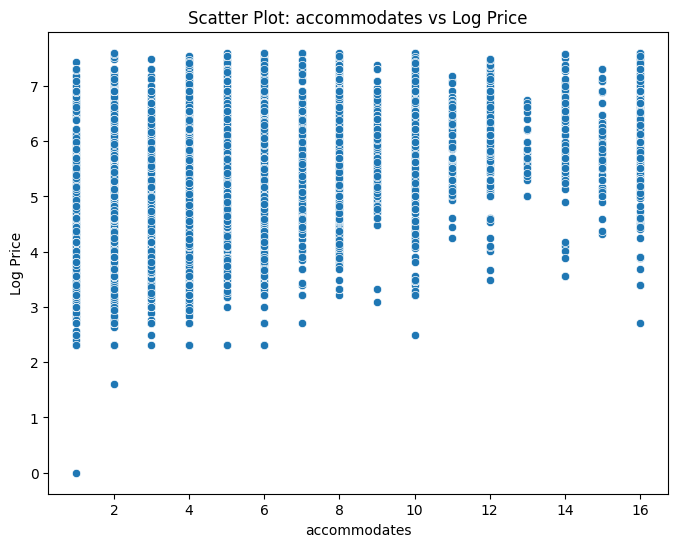

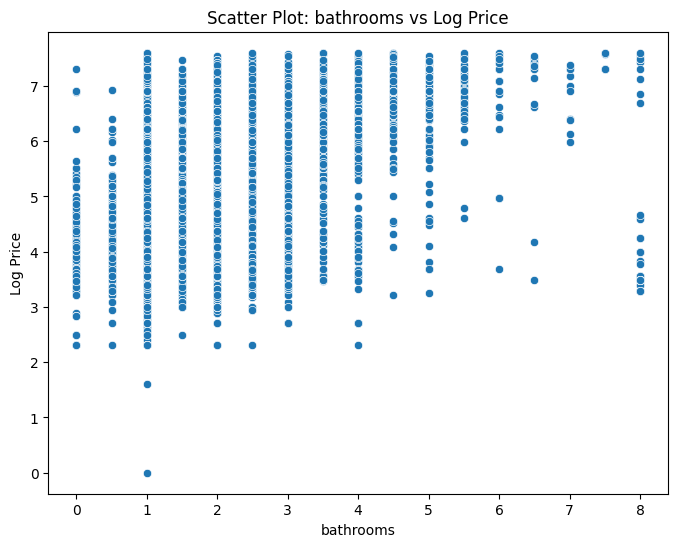

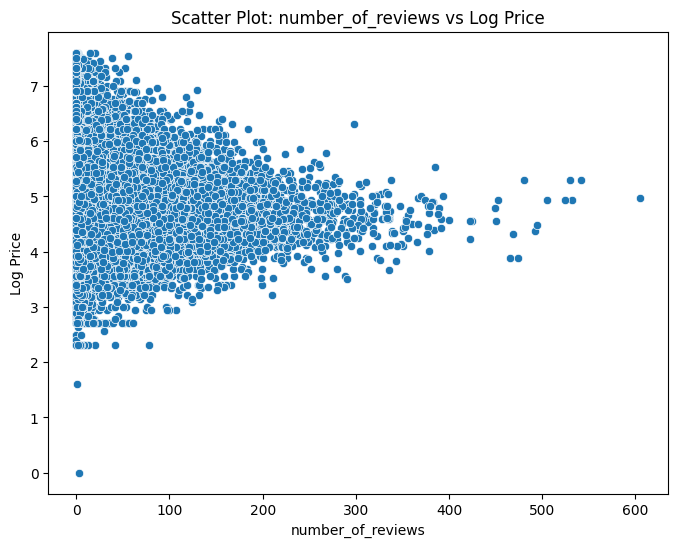

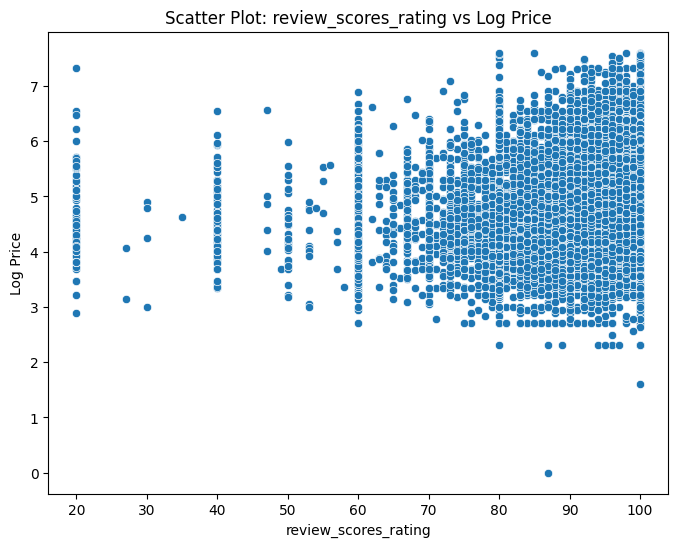

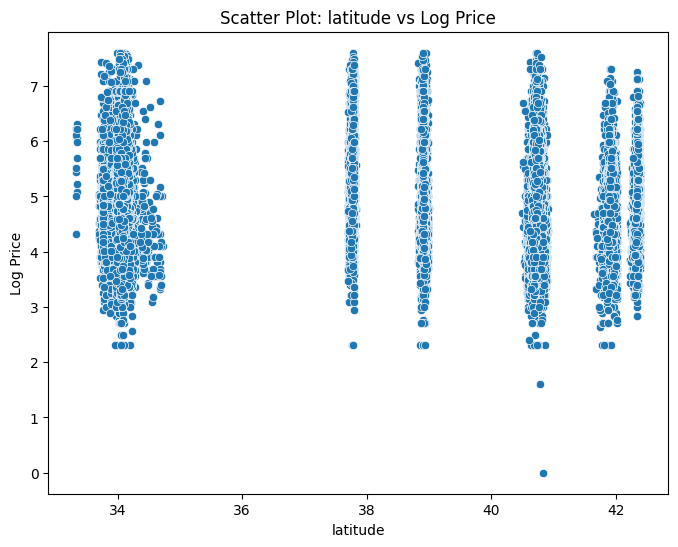

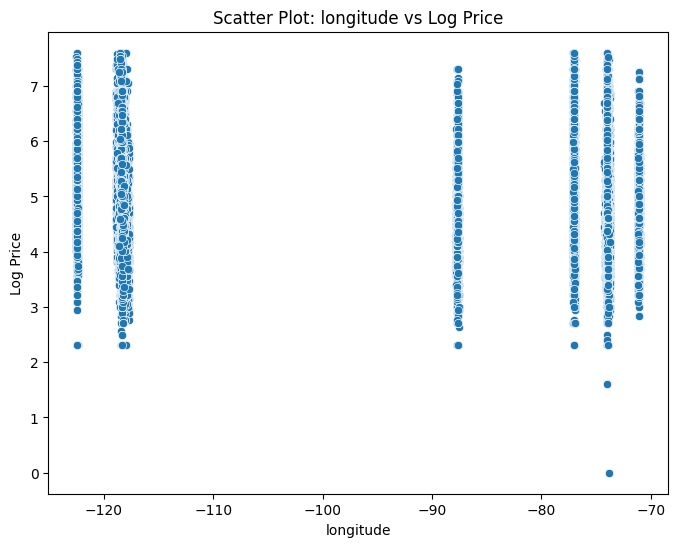

KeyError: 'Host_Tenure'

<Figure size 800x600 with 0 Axes>

In [ ]:
# Scatter plots for some important numerical features against log_price
numerical_features = ['accommodates', 'bathrooms', 'number_of_reviews', 'review_scores_rating',
                      'latitude', 'longitude', 'Host_Tenure', 'Amenities_Count', 'Days_Since_Last_Review','price_per_km_city_center', 'price_per_km_cluster_center']

for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=data[feature], y=data['log_price'])
    plt.title(f'Scatter Plot: {feature} vs Log Price')
    plt.xlabel(feature)
    plt.ylabel('Log Price')
    plt.show()


In [ ]:
# Impute missing values for all features
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
X = pd.DataFrame(X_imputed, columns=X.columns)

NameError: name 'SimpleImputer' is not defined

In [ ]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler

# Initialize Yeo-Johnson transformer
yeo_johnson_transformer = PowerTransformer(method='yeo-johnson')

# Apply Yeo-Johnson transformation on numerical features
transformed_data = yeo_johnson_transformer.fit_transform(X)

# Convert back to a DataFrame for easier visualization
transformed_df = pd.DataFrame(transformed_data, columns=X.columns)

# Scaling (standardization) after transformation
scaler = StandardScaler()
scaled_transformed_data = scaler.fit_transform(transformed_df)

# Convert scaled data back to a DataFrame
scaled_transformed_df = pd.DataFrame(scaled_transformed_data, columns=X.columns)


NameError: name 'X' is not defined

In [ ]:
# Distribution of Sentiment Scores
plt.figure(figsize=(10, 6))
sns.histplot(X['Sentiment_Score'], kde=True)
plt.title('Distribution of Sentiment Scores')
plt.show()

# Distribution of Sentiment Scores
plt.figure(figsize=(10, 6))
sns.histplot(data['Sentiment_Score'], kde=True)
plt.title('Distribution of Sentiment Scores')
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import pandas as pd
from geopy.distance import geodesic

# Drop rows with missing values in key geospatial columns
data = data.dropna(subset=['latitude', 'longitude', 'log_price'])

# Define a function to perform clustering within each city and neighborhood
def cluster_by_neighborhood(city_data):
    # Group further by neighborhood within each city
    for neighborhood in city_data['neighbourhood_encoded'].unique():
        neighborhood_data = city_data[city_data['neighbourhood_encoded'] == neighborhood]

        # Standardize latitudes and longitudes
        scaler = StandardScaler()
        coords = neighborhood_data[['latitude', 'longitude']].values
        coords_scaled = scaler.fit_transform(coords)

        # Perform DBSCAN clustering within each neighborhood
        db = DBSCAN(eps=0.2, min_samples=10).fit(coords_scaled)

        # Add cluster labels to the neighborhood data
        city_data.loc[city_data['neighbourhood_encoded'] == neighborhood, 'geo_cluster'] = db.labels_

    return city_data

# Apply the clustering function to each city with `as_index=False`
clustered_data = data.groupby('city_encoded', as_index=False).apply(cluster_by_neighborhood)


KeyError: 'city_encoded'

In [ ]:
# Function to calculate the city center and the distance from the city center for each point
def calculate_city_center(city_data):
    # Find the center of the city (mean latitude and longitude)
    city_center_coords = (city_data['latitude'].mean(), city_data['longitude'].mean())

    # Calculate the distance of each listing to the city center
    city_data['distance_to_center'] = city_data.apply(lambda row: geodesic((row['latitude'], row['longitude']), city_center_coords).km, axis=1)

    return city_data

# Apply this function to calculate distance from city center for each city
clustered_data = clustered_data.groupby('city_encoded', as_index=False).apply(calculate_city_center)


NameError: name 'clustered_data' is not defined

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for a specific city
def plot_city_analysis(city_encoded):
    city_data = clustered_data[clustered_data['city_encoded'] == city_encoded]

    # Scatter plot: Log Price vs Distance to City Center
    plt.figure(figsize=(10,6))
    sns.scatterplot(data=city_data, x='distance_to_center', y='log_price', hue='geo_cluster', palette='coolwarm')
    plt.title(f'Log Price vs Distance to City Center (City {city_encoded})')
    plt.xlabel('Distance to City Center (km)')
    plt.ylabel('Log Price')
    plt.show()

# Example: Plot geospatial analysis for Cities
plot_city_analysis(0)
plot_city_analysis(1)
plot_city_analysis(2)
plot_city_analysis(3)
plot_city_analysis(4)
plot_city_analysis(5)



NameError: name 'clustered_data' is not defined

In [ ]:
# Scatter plot: Combined view of all cities
plt.figure(figsize=(10,6))

# Plot all cities together
sns.scatterplot(data=clustered_data, x='distance_to_center', y='log_price', hue='city_encoded', palette='coolwarm')
plt.title('Log Price vs Distance to City Center (All Cities)')
plt.xlabel('Distance to City Center (km)')
plt.ylabel('Log Price')
plt.legend(title='City')
plt.show()


In [ ]:
# Splitting data and training model as before
X_train, X_temp, y_train, y_temp = train_test_split(scaled_transformed_df, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.67, random_state=42)

# Train the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate the model
y_val_pred = rf.predict(X_val)
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
val_r2 = r2_score(y_val, y_val_pred)

print(f"Validation RMSE: {val_rmse:.4f}")
print(f"Validation R2: {val_r2:.4f}")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import lightgbm as lgb


def clean_column_name(name):
    return re.sub(r'\W+', '_', name)


X_train, X_temp, y_train, y_temp = train_test_split(scaled_transformed_df, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.67, random_state=42)

# Fix column names to remove any special characters
X_train = X_train.rename(columns=clean_column_name)
X_val = X_val.rename(columns=clean_column_name)
X_test = X_test.rename(columns=clean_column_name)

# Convert all columns to numeric if applicable
X_train = X_train.apply(pd.to_numeric, errors='ignore')
X_val = X_val.apply(pd.to_numeric, errors='ignore')
X_test = X_test.apply(pd.to_numeric, errors='ignore')

# Ensure consistency in column names
common_columns = X_train.columns.intersection(X_val.columns).intersection(X_test.columns)
X_train = X_train[common_columns]
X_val = X_val[common_columns]
X_test = X_test[common_columns]

# Train the model
lgb_model = lgb.LGBMRegressor(n_estimators=100, random_state=42)
lgb_model.fit(X_train, y_train)

# Evaluate the model on the validation set
y_val_pred = lgb_model.predict(X_val)
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
val_r2 = r2_score(y_val, y_val_pred)

print(f"Validation RMSE (LightGBM): {val_rmse:.4f}")
print(f"Validation R2 (LightGBM): {val_r2:.4f}")



NameError: name 'scaled_transformed_df' is not defined

In [ ]:
def clean_column_name(name):
    return re.sub(r'\W+', '_', name)

X_train, X_temp, y_train, y_temp = train_test_split(scaled_transformed_df, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.67, random_state=42)

# Fix column names to remove any special characters
X_train = X_train.rename(columns=clean_column_name)
X_val = X_val.rename(columns=clean_column_name)
X_test = X_test.rename(columns=clean_column_name)

# Convert all columns to numeric if applicable
X_train = X_train.apply(pd.to_numeric, errors='ignore')
X_val = X_val.apply(pd.to_numeric, errors='ignore')
X_test = X_test.apply(pd.to_numeric, errors='ignore')

# Ensure consistency in column names
common_columns = X_train.columns.intersection(X_val.columns).intersection(X_test.columns)
X_train = X_train[common_columns]
X_val = X_val[common_columns]
X_test = X_test[common_columns]

def objective(trial: Trial):
    params = {
        "objective": "regression",
        "metric": "rmse",
        "verbosity": -1,
        "boosting_type": "gbdt",
        "n_estimators": trial.suggest_int("n_estimators", 50, 200),
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 20, 100),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "min_child_samples": trial.suggest_int("min_child_samples", 10, 100),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "reg_alpha": trial.suggest_float("reg_alpha", 0, 10),
        "reg_lambda": trial.suggest_float("reg_lambda", 0, 10),
    }

    model = lgb.LGBMRegressor(**params)
    score = cross_val_score(model, X_train, y_train, n_jobs=-1, cv=5, scoring="neg_mean_squared_error")
    return np.mean(score)

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.values[0]))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

# Train the model with best hyperparameters
best_params = study.best_params
lgb_model = lgb.LGBMRegressor(**best_params)
lgb_model.fit(X_train, y_train)

# Evaluate the model on the validation set
y_val_pred = lgb_model.predict(X_val)
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
val_r2 = r2_score(y_val, y_val_pred)

print(f"Validation RMSE (LightGBM with hyperparameter tuning): {val_rmse:.4f}")
print(f"Validation R2 (LightGBM with hyperparameter tuning): {val_r2:.4f}")


NameError: name 'scaled_transformed_df' is not defined

In [ ]:
import xgboost as xgb

# Splitting data and training model as before
X_train, X_temp, y_train, y_temp = train_test_split(scaled_transformed_df, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.67, random_state=42)

# Train the XGBoost model
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Evaluate the model
y_val_pred = xgb_model.predict(X_val)
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
val_r2 = r2_score(y_val, y_val_pred)

print(f"Validation RMSE: {val_rmse:.4f}")
print(f"Validation R2: {val_r2:.4f}")

NameError: name 'scaled_transformed_df' is not defined

In [ ]:
from sklearn.model_selection import cross_val_score

def objective(trial: Trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 200),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "gamma": trial.suggest_float("gamma", 0, 10),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "reg_alpha": trial.suggest_float("reg_alpha", 0, 10),
        "reg_lambda": trial.suggest_float("reg_lambda", 0, 10),
    }

    model = xgb.XGBRegressor(**params)
    score = cross_val_score(model, X_train, y_train, n_jobs=-1, cv=5, scoring="neg_mean_squared_error")
    return np.mean(score)

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.values[0]))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

# Train the model with best hyperparameters
best_params = study.best_params
xgb_model = xgb.XGBRegressor(**best_params)
xgb_model.fit(X_train, y_train)

# Evaluate the model on the validation set
y_val_pred = xgb_model.predict(X_val)
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
val_r2 = r2_score(y_val, y_val_pred)

print(f"Validation RMSE (XGBoost with hyperparameter tuning): {val_rmse:.4f}")
print(f"Validation R2 (XGBoost with hyperparameter tuning): {val_r2:.4f}")


In [ ]:
def objective(trial):
    # Hyperparameter definitions
    n_estimators = trial.suggest_int('n_estimators', 100, 1000)
    max_depth = trial.suggest_int('max_depth', 3, 10)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)

    # Create Random Forest Regressor
    rf = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf
    )

    # Cross-validation to evaluate performance
    scores = cross_val_score(rf, X, y, cv=5, scoring='neg_mean_squared_error')

    # Return the negative mean squared error
    return -scores.mean()

In [ ]:
study = optuna.create_study(direction='minimize')

In [ ]:
study.optimize(objective, n_trials=100, n_jobs=-1)


In [ ]:
best_trial = study.best_trial
print('Best trial:')
print(f'  Value: {best_trial.value}')
print(f'  Params: {best_trial.params}')

In [ ]:
from optuna.trial import Trial

# Study object
study = optuna.create_study(direction='minimize')

# Run the optimization
study.optimize(objective, n_trials=100)

# Get the best parameters
best_params = study.best_params
print("Best parameters:", best_params)

# Train the model with the best parameters
best_rf = RandomForestRegressor(**best_params)
best_rf.fit(X_train, y_train)

# Evaluate the model
y_val_pred = best_rf.predict(X_val)
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
val_r2 = r2_score(y_val, y_val_pred)

print(f"Validation RMSE (Best RF): {val_rmse:.4f}")
print(f"Validation R2 (Best RF): {val_r2:.4f}")


ModuleNotFoundError: No module named 'optuna'

In [ ]:
# Create a LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train,
    feature_names=features,
  # Replace with feature names if available
    class_names=None,  # Replace with class names if available
    mode='regression'
)

# Choose an instance to explain
instance_index = 0
instance = X_test[instance_index]

# Explain the prediction
explanation = explainer.explain_instance(instance, rf.predict_proba)

# Print the explanation
print(explanation.show_in_notebook(show_all=False))

NameError: name 'X_train' is not defined

In [ ]:
# Prepare the data for SHAP
X = data.drop('log_price', axis=1)

# Get SHAP values
explainer = shap.KernelExplainer(rf.predict_proba, X, nsamples=100)  # Adjust nsamples as needed
shap_values = explainer.shap_values(X)

# Visualize feature importance
shap.summary_plot(shap_values, X)

# Visualize a specific instance
instance_index = 0
shap.force_plot(explainer.expected_value[1], shap_values[1][instance_index], X.iloc[instance_index])

NameError: name 'rf' is not defined

In [ ]:
# Create a LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train,
    feature_names=features,
  # Replace with feature names if available
    class_names=None,  # Replace with class names if available
    mode='regression'
)

# Choose an instance to explain
instance_index = 0
instance = X_test[instance_index]

# Explain the prediction
explanation = explainer.explain_instance(instance, lgb_model.predict_proba)

# Print the explanation
print(explanation.show_in_notebook(show_all=False))

In [ ]:
# Prepare the data for SHAP
X = data.drop('log_price', axis=1)

# Get SHAP values
explainer = shap.KernelExplainer(lgb_model.predict_proba, X, nsamples=100)  # Adjust nsamples as needed
shap_values = explainer.shap_values(X)

# Visualize feature importance
shap.summary_plot(shap_values, X)

# Visualize a specific instance
instance_index = 0
shap.force_plot(explainer.expected_value[1], shap_values[1][instance_index], X.iloc[instance_index])

In [ ]:
# Create a LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train,
    feature_names=features,
  # Replace with feature names if available
    class_names=None,  # Replace with class names if available
    mode='regression'
)

# Choose an instance to explain
instance_index = 0
instance = X_test[instance_index]

# Explain the prediction
explanation = explainer.explain_instance(instance, xgb_model.predict_proba)

# Print the explanation
print(explanation.show_in_notebook(show_all=False))

In [ ]:
# Prepare the data for SHAP
X = data.drop('log_price', axis=1)

# Get SHAP values
explainer = shap.KernelExplainer(xgb_model.predict_proba, X, nsamples=100)  # Adjust nsamples as needed
shap_values = explainer.shap_values(X)

# Visualize feature importance
shap.summary_plot(shap_values, X)

# Visualize a specific instance
instance_index = 0
shap.force_plot(explainer.expected_value[1], shap_values[1][instance_index], X.iloc[instance_index])

NameError: name 'xgb_model' is not defined